In [13]:
# Problem 4

import pandas as pd
    
dice1 = [1, 2, 3, 4, 5, 6]
dice2 = [1, 2, 3, 4, 5, 6]
dice3 = [1, 2, 3, 4, 5, 6]


data = [[d1, d2, d3, d1 + d2 + d3, d1 * d2 * d3] for d1 in dice1 for d2 in dice2 for d3 in dice3]

df = pd.DataFrame(data, columns=["dice1", "dice2", "dice3", "sum_of_dots", "product_of_dots"])
total_count = len(dice1) * len(dice2) * len(dice3)

# Expectation of sum of number of dots on the three rolls
sum_pmf = [(x[0], count_x / (total_count * 1.0)) for x, count_x in df.value_counts(["sum_of_dots"]).items()]
sum_pmf_df = pd.DataFrame(sum_pmf, columns=["x", "P(X)"])
sum_pmf_df["x * P(X)"] = sum_pmf_df["x"] *  sum_pmf_df["P(X)"] 
expectation_sum = sum_pmf_df["x * P(X)"].sum()

# Expectation of product of number of dots on the three rolls
product_pmf = [(x[0], count_x / (total_count * 1.0)) for x, count_x in df.value_counts(["product_of_dots"]).items()]
product_pmf_df = pd.DataFrame(product_pmf, columns=["x", "P(X)"])
product_pmf_df["x * P(X)"] = product_pmf_df["x"] *  product_pmf_df["P(X)"] 
expectation_product = product_pmf_df["x * P(X)"].sum()

print("\nData for sum")
print(sum_pmf_df)
print("\nExpectation for sum: {}".format(expectation_sum))

print("\nData for product")
print(product_pmf_df)
print("\n Expectation for product {}".format(expectation_product))


Data for sum
     x      P(X)  x * P(X)
0   10  0.125000  1.250000
1   11  0.125000  1.375000
2    9  0.115741  1.041667
3   12  0.115741  1.388889
4    8  0.097222  0.777778
5   13  0.097222  1.263889
6    7  0.069444  0.486111
7   14  0.069444  0.972222
8    6  0.046296  0.277778
9   15  0.046296  0.694444
10   5  0.027778  0.138889
11  16  0.027778  0.444444
12   4  0.013889  0.055556
13  17  0.013889  0.236111
14   3  0.004630  0.013889
15  18  0.004630  0.083333

Expectation for sum: 10.5

Data for product
      x      P(X)  x * P(X)
0    12  0.069444  0.833333
1    24  0.069444  1.666667
2    30  0.055556  1.666667
3    60  0.055556  3.333333
4    36  0.055556  2.000000
5    18  0.041667  0.750000
6    72  0.041667  3.000000
7     6  0.041667  0.250000
8    48  0.041667  2.000000
9    20  0.041667  0.833333
10    8  0.032407  0.259259
11   90  0.027778  2.500000
12   40  0.027778  1.111111
13   16  0.027778  0.444444
14   10  0.027778  0.277778
15    4  0.027778  0.111111
16   1

In [14]:
## Problem 5
from pulp import *
from IPython.display import HTML, display

def display_table(table):
    display(HTML(
       '<table><tr>{}</tr></table>'.format(
           '</tr><tr>'.join(
               '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in table)
           )
    ))
    
problem = LpProblem('MSML_602_PCS2_HW1_Q5', LpMaximize)

X = LpVariable('X', cat='Continuous')
Y = LpVariable('Y', cat='Continuous')
Z = LpVariable('Z', cat='Continuous')

problem += 15 * X + 2 * Y + Z, "Objective Function"
problem += X <= 10, "Constraint X"
problem += X + Y <= 17, "Constraint X, Y"
problem += 2 * X + 3 * Z <= 25, "Constraint X, Z"
problem += Y + Z >= 11, "Constraint Y, Z"

problem.solve()
print("Solution:")

data = [["Variable", "Value"]] + [[v.name, v.varValue] for v in problem.variables()]
data += [["Objective", problem.objective.value()]]

display_table(data)

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/b6c9e0371f914493bd8e01c99d488dc1-pulp.mps max timeMode elapsed branch printingOptions all solution /tmp/b6c9e0371f914493bd8e01c99d488dc1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 20 RHS
At line 25 BOUNDS
At line 29 ENDATA
Problem MODEL has 4 rows, 3 columns and 7 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-4) rows, 0 (-3) columns and 0 (-7) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 148.4
After Postsolve, objective 148.4, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 148.4 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Solut

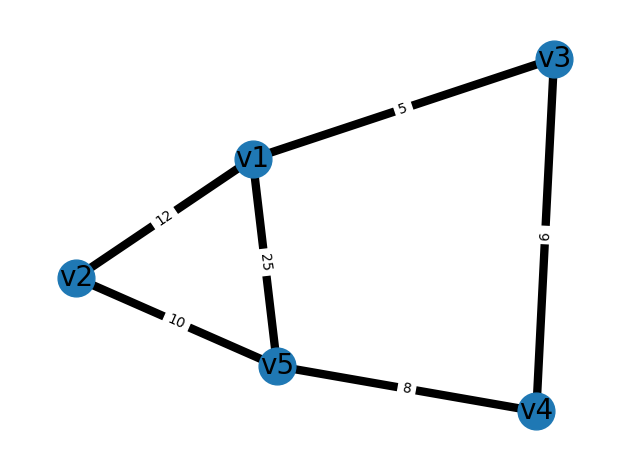

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/7efaabba2ec74d7a9fa959ed5c88312d-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/7efaabba2ec74d7a9fa959ed5c88312d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 65 RHS
At line 71 BOUNDS
At line 84 ENDATA
Problem MODEL has 5 rows, 12 columns and 18 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 19 - 0.00 seconds
Cgl0004I processed model has 5 rows, 11 columns (11 integer (11 of which binary)) and 18 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 19
Cbc0038I Before mini branch and bound, 11 integers at bound fixed and 0 continuous
Cbc0038I Mini branch and bound did not improve so

/opt/conda/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [15]:
# HW1 Problem 6

from pulp import *
import networkx as nx
import matplotlib.pyplot as plt



# I assumed the following arbitrary graph
G = nx.Graph()
G.add_edge("v1", "v2", weight=12)
G.add_edge("v1", "v3", weight=5)
G.add_edge("v1", "v5", weight=25)
G.add_edge("v2", "v5", weight=10)
G.add_edge("v3", "v4", weight=6)
G.add_edge("v4", "v5", weight=8)

# I am finding the shortest path from vertex 1 to vertex 5
source = "v1"
target = "v5"

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7) 

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()


prob = pulp.LpProblem("Shortest Path Problem", LpMinimize)
cost = nx.get_edge_attributes(G, "weight")
target_vars = {}

for i, j in G.edges:
    x = LpVariable("x_{0}_{1}".format(i,j), cat="Binary")
    y = LpVariable("x_{0}_{1}".format(j, i), cat="Binary")
    target_vars[i, j] = x
    target_vars[j, i] = y

prob += lpSum([cost[i, j] * target_vars[i, j] for i, j in G.edges] + [cost[i, j] * target_vars[j, i] for i, j in G.edges]), "Objective function"

for node in G.nodes:
    if node == source:
         prob += pulp.lpSum([target_vars[i, j] for i, j in target_vars if i == node]) == 1
    elif node == target:
         prob += pulp.lpSum([target_vars[i, j] for i, j in target_vars if j == node]) == 1
    else:
        prob += pulp.lpSum([target_vars[i, j] for i, j in target_vars if i == node]) - pulp.lpSum([target_vars[i, j] for i, j in target_vars if j == node]) == 0

prob.solve()
print("Shortest distance from {0} to {1} = ".format(source, target), value(prob.objective))

chosen_vars = list(filter(lambda v: v.varValue > 0, prob.variables()))
routes = list(map(lambda x: x.name.replace("x_", "").replace("_", "->"), chosen_vars))
print(routes)
    


In [29]:
## Problem 8a

from pulp import *
import random

cpus=["cpu1", "cpu2", "cpu3", "cpu4"]
jobs=["job1", "job2", "job3", "job4"]



prob = LpProblem("CPU Assignment", LpMinimize) 
time_values = {
    'job1': {'cpu1': 2, 'cpu2': 6, 'cpu3': 5, 'cpu4': 4}, 
    'job2': {'cpu1': 4, 'cpu2': 6, 'cpu3': 7, 'cpu4': 9}, 
    'job3': {'cpu1': 8, 'cpu2': 3, 'cpu3': 4, 'cpu4': 1}, 
    'job4': {'cpu1': 2, 'cpu2': 3, 'cpu3': 1, 'cpu4': 1}
}
time_vars = {}
for j in jobs:
    time_vars[j] = {}
    for c in cpus:
        time_vars[j][c] = LpVariable("time_{0}_{1}".format(j,c), 0, None, LpInteger)

        
job_cpu_combinations = [(j, c) for j in jobs for c in cpus]
print(job_cpu_combinations)

prob += (
    lpSum([time_vars[j][c] * time_values[j][c] for (j, c) in job_cpu_combinations]),
    "Sum_of_Assignment_Costs",
)


for j in jobs:
    prob+= lpSum(time_vars[j][c] for c in cpus) == 1

for c in cpus:
    prob+= lpSum(time_vars[j][c] for j in jobs) == 1
    
prob.solve()

print("############ TIME COST MATRIX")
print(time_values)
print("################## VARIABLES")
print(time_vars)
print("########### VALUES ##########")
for v in prob.variables():
    print(v.name, "=", v.varValue)


print("\n####### JOB ASSIGNMENTS ######\n")
assignments = { }
for job in time_vars:
    cpus = time_vars[job]
    assigned = []
    for cpu in cpus:
        if cpus[cpu].varValue == 1:
            assigned.append(cpu)
    assignments[job] = assigned
    print("{0} is assigned to {1}".format(job, assigned))

print("\nValue of Objective Function = ", value(prob.objective))

[('job1', 'cpu1'), ('job1', 'cpu2'), ('job1', 'cpu3'), ('job1', 'cpu4'), ('job2', 'cpu1'), ('job2', 'cpu2'), ('job2', 'cpu3'), ('job2', 'cpu4'), ('job3', 'cpu1'), ('job3', 'cpu2'), ('job3', 'cpu3'), ('job3', 'cpu4'), ('job4', 'cpu1'), ('job4', 'cpu2'), ('job4', 'cpu3'), ('job4', 'cpu4')]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/c85182008d6145a5a1478dcbce27ffa7-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/c85182008d6145a5a1478dcbce27ffa7-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 13 COLUMNS
At line 94 RHS
At line 103 BOUNDS
At line 120 ENDATA
Problem MODEL has 8 rows, 16 columns and 32 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 10 - 0.00 seconds
Cgl0004I processed model has 8 rows, 16 columns (16 integer (16 of which 

In [17]:
# Problem 8b
from pulp import *
import random

cpus=["cpu1", "cpu2"]
jobs=["job1", "job2"]

time_values = {
    "cpu1": {"job1": 2, "job2": 7 },
    "cpu2": {"job1": 1, "job2": 3 }
}

prob = LpProblem("CPU Assignment", LpMinimize) 
time_vars = {}
for c in cpus:
    time_vars[c] = {}
    for j in jobs:
        time_vars[c][j] = LpVariable("time_{0}_{1}".format(j,c), 0, cat="Integer")

print("############ TIME COST MATRIX")
print(time_values)
print("################## VARIABLES")
print(time_vars)
print("#############################")
cpu_job_combinations = [(c, j) for c in cpus for j in jobs]
print(cpu_job_combinations)

prob += (
    lpSum([time_vars[c][j] * time_values[c][j] for (c, j) in cpu_job_combinations]),
    "Sum_of_Assignment_Costs",
)


for j in jobs:
    prob+= lpSum(time_vars[c][j] for c in cpus) == 1

for c in cpus:
    prob+= lpSum(time_vars[c][j] for j in jobs) == 1
prob.solve()

for v in prob.variables():
    print(v.name, "=", v.varValue)
    
print("Value of Objective Function = ", value(prob.objective))

############ TIME COST MATRIX
{'cpu1': {'job1': 2, 'job2': 7}, 'cpu2': {'job1': 1, 'job2': 3}}
################## VARIABLES
{'cpu1': {'job1': time_job1_cpu1, 'job2': time_job2_cpu1}, 'cpu2': {'job1': time_job1_cpu2, 'job2': time_job2_cpu2}}
#############################
[('cpu1', 'job1'), ('cpu1', 'job2'), ('cpu2', 'job1'), ('cpu2', 'job2')]
Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/06652fcfafa94d56aa62c1066888fd9d-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/06652fcfafa94d56aa62c1066888fd9d-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 30 RHS
At line 35 BOUNDS
At line 40 ENDATA
Problem MODEL has 4 rows, 4 columns and 8 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 5 - 0.00 seconds
Cgl0004I processed model

### Integer LP VS LP Relaxation 

I have assumed the following costs for each job, cpu combination:

| | cpu1 | cpu2 |
|-|------|------|
|job1|2|1|
|job2|7|3|

I have set up the following variables in PulPfor ILP & LP Relaxation respectively:

**For ILP**

The variable category is set as Integer 

| | cpu1 | cpu2 |
|-|------|------|
|job1|x-j1c1-integer|x-j1c2-integer|
|job2|x-j2c1-integer|x-j2c2-integer|

**For LP Relaxation**

The variable category is set as Continuous

| | cpu1 | cpu2 |
|-|------|------|
|job1|x-j1c1-continuous|x-j1c2-continuous|
|job2|x-j2c1-continuous|x-j2c2-continuous|

I defined two different problems:
- `prob_integer` for ILP
- `prob_relaxed` for LP Relaxation 


### Findings:
I get the same solution for bot ILP and LP Relaxation. I could not find an optimal solution for LP Relaxation that is lower than the ILP solution.

Here were my results:

**For ILP**

| | cpu1 | cpu2 |
|-|------|------|
|job1|1|0|
|job2|0|1|

Value of Objective Function: 5.0

**For LP Relaxation**

| | cpu1 | cpu2 |
|-|------|------|
|job1|1|0|
|job2|0|1|

Value of Objective Function: 5.0

In [10]:
## LP Relaxed
from pulp import *
import random

cpus=["cpu1", "cpu2"]
jobs=["job1", "job2"]

combinations = [
    (1,1),
    (1,2),
    (2,1),
    (2,2),
]

# Cost (job, cpu)
costs = {
    (1,1): 2.0, 
    (1,2): 1.0,
    (2,1): 7.0,
    (2,2): 3.0
}
variables_integer = {
    (1,1): LpVariable("x-j1c1-integer", cat="Integer"),
    (1,2): LpVariable("x-j1c2-integer", cat="Integer"),
    (2,1): LpVariable("x-j1c2-integer", cat="Integer"),
    (2,2): LpVariable("x-j1c2-integer", cat="Integer")
}
   
variables_relaxed = {
    (1,1): LpVariable("x-j1c1-continuous", cat="Continuous"),
    (1,2): LpVariable("x-j1c2-continuous", cat="Continuous"),
    (2,1): LpVariable("x-j1c2-continuous", cat="Continuous"),
    (2,2): LpVariable("x-j1c2-continuous", cat="Continuous")
}
    
prob_integer = LpProblem("CPU Assignment Integer", LpMinimize) 
prob_relaxed = LpProblem("CPU Assignment Relaxed", LpMinimize)

prob_integer += (
    lpSum([variables_integer[(j, c)] * costs[(j, c)] for (j, c) in combinations]),
    "Sum_of_Assignment_Costs (Integer LP)",
)
prob_relaxed += (
    lpSum([variables_relaxed[(j, c)] * costs[(j, c)] for (j, c) in combinations]),
    "Sum_of_Assignment_Costs (LP Relaxed)",
)

prob_integer += lpSum([variables_integer[(1,1)], variables_integer[(1,2)]]) == 1 
prob_integer += lpSum([variables_integer[(2,1)], variables_integer[(2,2)]]) == 1 
prob_integer += lpSum([variables_integer[(1,1)], variables_integer[(2,1)]]) == 1 
prob_integer += lpSum([variables_integer[(1,2)], variables_integer[(2,2)]]) == 1

prob_relaxed += variables_relaxed[(1,1)] >= 0
prob_relaxed += variables_relaxed[(1,1)] <= 1
prob_relaxed += variables_relaxed[(2,1)] >= 0
prob_relaxed += variables_relaxed[(2,1)] <= 1
prob_relaxed += variables_relaxed[(1,2)] >= 0
prob_relaxed += variables_relaxed[(1,2)] <= 1
prob_relaxed += variables_relaxed[(2,2)] >= 0
prob_relaxed += variables_relaxed[(2,2)] <= 1
prob_relaxed += lpSum([variables_relaxed[(1,1)], variables_relaxed[(1,2)]]) == 1 
prob_relaxed += lpSum([variables_relaxed[(2,1)], variables_relaxed[(2,2)]]) == 1 
prob_relaxed += lpSum([variables_relaxed[(1,1)], variables_relaxed[(2,1)]]) == 1 
prob_relaxed += lpSum([variables_relaxed[(1,2)], variables_relaxed[(2,2)]]) == 1
print(prob_relaxed)

prob_integer.solve()
prob_relaxed.solve()

print("\n############### Integer LP #################### \n")
for v in prob_integer.variables():
    print(v.name, "=", v.varValue)
    
print("Value of Objective Function (Integer LP) = ", value(prob_integer.objective))

print("\n############### LP Relaxation #################### \n")
for v in prob_relaxed.variables():
    print(v.name, "=", v.varValue)
    
print("Value of Objective Function (Relaxed LP) = ", value(prob_relaxed.objective))

CPU_Assignment_Relaxed:
MINIMIZE
2.0*job_1_cpu_1_cont + 1.0*job_1_cpu_2_cont + 7.0*job_2_cpu_1_cont + 3.0*job_2_cpu_2_cont + 0.0
SUBJECT TO
_C1: job_1_cpu_1_cont >= 0

_C2: job_1_cpu_1_cont <= 1

_C3: job_2_cpu_1_cont >= 0

_C4: job_2_cpu_1_cont <= 1

_C5: job_1_cpu_2_cont >= 0

_C6: job_1_cpu_2_cont <= 1

_C7: job_2_cpu_2_cont >= 0

_C8: job_2_cpu_2_cont <= 1

_C9: job_1_cpu_1_cont + job_1_cpu_2_cont = 1

_C10: job_2_cpu_1_cont + job_2_cpu_2_cont = 1

_C11: job_1_cpu_1_cont + job_2_cpu_1_cont = 1

_C12: job_1_cpu_2_cont + job_2_cpu_2_cont = 1

VARIABLES
job_1_cpu_1_cont free Continuous
job_1_cpu_2_cont free Continuous
job_2_cpu_1_cont free Continuous
job_2_cpu_2_cont free Continuous

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.9/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/1ae75808cf8a4b5f8ae6348d6e1229dc-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/1ae75808cf8a4b5f8ae6348d6e1229dc

### Problem 9

I set up an arbitrary graph using Networkx and implemented the constraints that I wrote in the homework sheet. The different colors of nodes in the graph represent the two groups the graph is bisected to. 

{('v1', 'v2'): edge_v1_v2, ('v1', 'v3'): edge_v1_v3, ('v1', 'v5'): edge_v1_v5, ('v2', 'v5'): edge_v2_v5, ('v3', 'v6'): edge_v3_v6, ('v5', 'v4'): edge_v5_v4, ('v5', 'v6'): edge_v5_v6, ('v4', 'v6'): edge_v4_v6}
Bisection_problem:
MINIMIZE
1*edge_v1_v2 + 1*edge_v1_v3 + 1*edge_v1_v5 + 1*edge_v2_v5 + 1*edge_v3_v6 + 1*edge_v4_v6 + 1*edge_v5_v4 + 1*edge_v5_v6 + 0
SUBJECT TO
_C1: partition_v1 + partition_v2 + partition_v3 + partition_v4 + partition_v5
 + partition_v6 = 3

_C2: - edge_v1_v2 + partition_v1 - partition_v2 <= 0

_C3: - edge_v1_v2 - partition_v1 + partition_v2 <= 0

_C4: - edge_v1_v3 + partition_v1 - partition_v3 <= 0

_C5: - edge_v1_v3 - partition_v1 + partition_v3 <= 0

_C6: - edge_v1_v5 + partition_v1 - partition_v5 <= 0

_C7: - edge_v1_v5 - partition_v1 + partition_v5 <= 0

_C8: - edge_v2_v5 + partition_v2 - partition_v5 <= 0

_C9: - edge_v2_v5 - partition_v2 + partition_v5 <= 0

_C10: - edge_v3_v6 + partition_v3 - partition_v6 <= 0

_C11: - edge_v3_v6 - partition_v3 + partitio

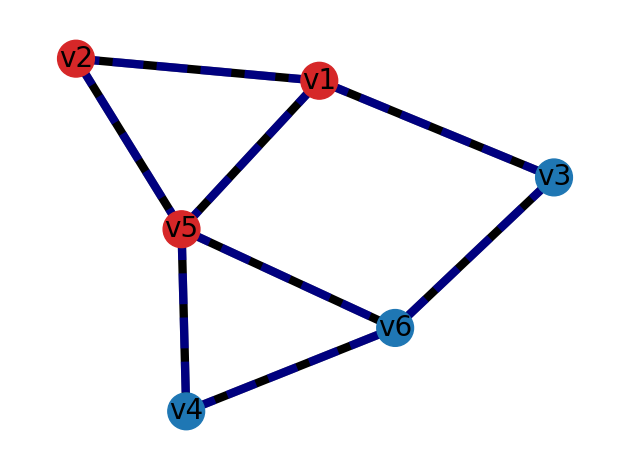

In [18]:
# HW1 Problem 9

from pulp import *
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge("v1", "v2")
G.add_edge("v1", "v3")
G.add_edge("v1", "v5")
G.add_edge("v2", "v5")
G.add_edge("v4", "v5")
G.add_edge("v3", "v6")
G.add_edge("v4", "v6")
G.add_edge("v5", "v6")

partitions = {}
for node in G.nodes:
   partitions[node] = LpVariable("partition_{0}".format(node), cat="Integer")


prob = pulp.LpProblem("Bisection problem", LpMinimize)

edge_vars = {}

for edge in G.edges:
    edge_vars[edge] = LpVariable("edge_{0}_{1}".format(edge[0],edge[1]))
    
print(edge_vars)

prob+= lpSum([edge_vars[edge] for edge in G.edges]), "Our objective statement"
prob+= lpSum([partitions[node] for node in G.nodes]) == 3
    
for x, y in G.edges:
    prob += partitions[x] - partitions[y] <= edge_vars[(x,y)]
    prob += partitions[y] - partitions[x] <= edge_vars[(x,y)]
    
print(prob)    

prob.solve()
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes

colors = ["tab:red" if partitions[node].varValue > 0 else "tab:blue" for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=colors)

# edges
nx.draw_networkx_edges(G, pos, width=6)
nx.draw_networkx_edges(
    G, pos, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()